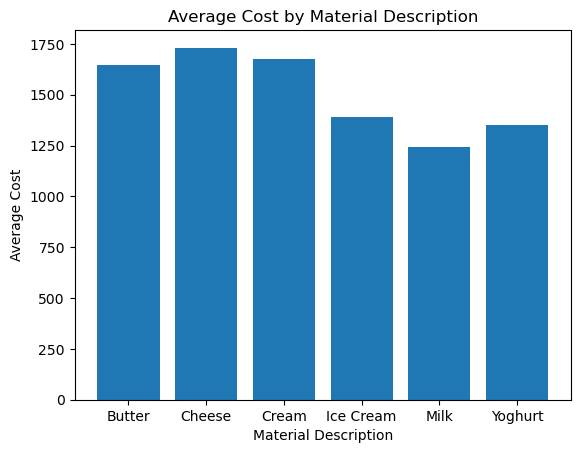

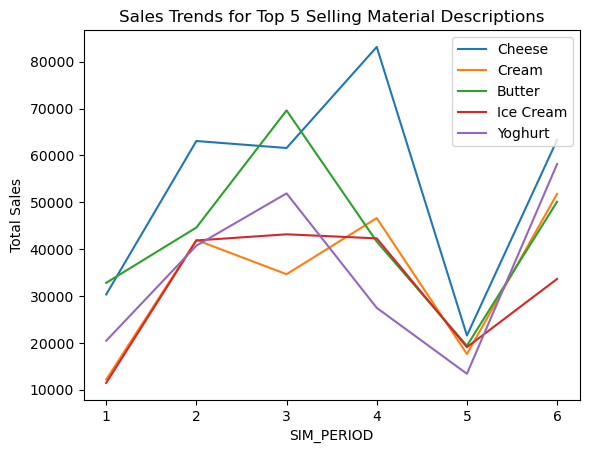

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "https://github.com/MitaliP001/game/raw/main/sfinal_csv.csv"
df = pd.read_csv(file_path)

# Filter the data for sales organization 00
df_filtered = df[df['SALES_ORGANIZATION'] == 'OO']

# Group the filtered data by MATERIAL_DESCRIPTION and calculate the mean of COST for each material
df_grouped = df_filtered.groupby('MATERIAL_DESCRIPTION')['COST'].mean().reset_index()

# Create a bar graph
plt.bar(df_grouped['MATERIAL_DESCRIPTION'], df_grouped['COST'])
plt.xlabel('Material Description')
plt.ylabel('Average Cost')
plt.title('Average Cost by Material Description')
plt.show()

# Identify the top 5 selling material descriptions
top_5_selling = df_grouped.nlargest(5, 'COST')['MATERIAL_DESCRIPTION']

# Filter the data to only include the top 5 selling material descriptions
df_filtered_top5 = df[df['MATERIAL_DESCRIPTION'].isin(top_5_selling)]

# Create a line graph of sales trends for the top 5 selling material descriptions
df_top_5_grouped = df_filtered_top5.groupby(['SIM_PERIOD', 'MATERIAL_DESCRIPTION'])['COST'].sum().unstack()

for material_description in top_5_selling:
    plt.plot(df_top_5_grouped.index, df_top_5_grouped[material_description], label=material_description)

plt.xlabel('SIM_PERIOD')
plt.ylabel('Total Sales')
plt.title('Sales Trends for Top 5 Selling Material Descriptions')
plt.legend()
plt.show()
